In [1]:
# This snippet of code properly adds the working source root path to python's path
# so you no longer have to install spykshrk through setuptools
import sys, os
root_depth = 2
notebook_dir = globals()['_dh'][0]
root_path = os.path.abspath(os.path.join(notebook_dir, '../'*root_depth))
# Add to python's path
try:
    while True:
        sys.path.remove(root_path)
except ValueError:
    # no more root paths
    pass
sys.path.append(root_path)
# Alternatively set root path as current working directory
#os.chdir(root_path)

In [1]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

#pd.set_option('float_format', '{:,.2f}'.format)
pd.set_option('display.precision', 4)
pd.set_option('display.max_rows', 10)
#pd.set_option('display.width', 180)


idx = pd.IndexSlice

In [101]:
# Load merged rec HDF store based on config

#config_file = '/opt/data36/daliu/realtime/spykshrk/test/test_animal.config.json'
config_file = '/home/mcoulter/spykshrk_realtime/config/test_single_MEC.json'
config = json.load(open(config_file, 'r'))

#hdf_file = os.path.join(config['files']['output_dir'],
#                        '{}.rec_merged.h5'.format(config['files']['prefix']))
hdf_file = '/mnt/vortex/mcoulter/spykshrk_realtime/output/test_single_MEC.rec_merged.h5'

store = pd.HDFStore(hdf_file, mode='r')


In [9]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: /mnt/vortex/mcoulter/spykshrk_realtime/output/test_single_MEC.rec_merged.h5

In [84]:
store.keys()

['/rec_1', '/rec_10', '/rec_100', '/rec_11', '/rec_3', '/rec_4', '/rec_5']

In [11]:
df = store['rec_100']

In [40]:
np.unique(df['label'])

array(['dec_proc', 'dec_recv', 'enc_recv', 'rip_recv', 'rip_send',
       'spk_dec', 'spk_enc', 'stim_rip_state'], dtype=object)

In [102]:
ripple_data = store['rec_1']
encoder_data = store['rec_3']
decoder_data = store['rec_4']
decoder_missed_spikes = store['rec_5']
timing_data = store['rec_100']
#stim_lockout = store['rec_11']

In [105]:
# most dropped spikes come from tet 5, and it is out of proportion to the firing rate
# firing rate of 5 is ~2x of 11 and 19 but dropout rate is ~6x
encoder_data.loc[encoder_data['position'] > 700]
#encoder_data
ripple_data.loc[ripple_data['thresh_crossed'] == False]
decoder_missed_spikes.loc[decoder_missed_spikes['elec_grp_id'] == 5]
decoder_missed_spikes.loc[decoder_missed_spikes['elec_grp_id'] == 6]
decoder_missed_spikes
#timing_data
#encoder_data[8360:8370]
#encoder_data
encoder_data
#decoder_data[decoder_data['spike_count']<1]
#ripple_data

,rec_ind,timestamp,elec_grp_id,position,x000,x001,x002,x003,x004,x005,...,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129
0,2,39650417,30,0.8091,0.0026,0.0077,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,...,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03
1,4,39650461,26,0.8091,0.0026,0.0077,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,...,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03
2,8,39650536,26,0.8091,0.0026,0.0077,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,...,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03,7.7320e-03
3,12,39650606,26,0.8091,0.5408,0.0036,3.5600e-03,3.5600e-03,3.5600e-03,3.5600e-03,...,3.5600e-03,3.5600e-03,3.5600e-03,3.5600e-03,3.5600e-03,3.5600e-03,3.5600e-03,3.5600e-03,3.5600e-03,3.5600e-03
4,14,39650968,30,0.8091,0.9824,0.0001,1.3679e-04,1.3679e-04,1.3679e-04,1.3679e-04,...,1.3679e-04,1.3679e-04,1.3679e-04,1.3679e-04,1.3679e-04,1.3679e-04,1.3679e-04,1.3679e-04,1.3679e-04,1.3679e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15810,57664,43351263,24,1.0000,0.5516,0.4354,1.0168e-04,1.0168e-04,1.0168e-04,1.0168e-04,...,1.0168e-04,1.0168e-04,1.0168e-04,1.0168e-04,1.0168e-04,1.0168e-04,1.0168e-04,1.0168e-04,1.0168e-04,1.0168e-04
15811,55822,43351295,26,1.0000,0.6852,0.2913,1.8359e-04,1.8359e-04,1.8359e-04,1.8359e-04,...,1.8359e-04,1.8359e-04,1.8359e-04,1.8359e-04,1.8359e-04,1.8359e-04,1.8359e-04,1.8359e-04,1.8359e-04,1.8359e-04
15812,57669,43351416,24,1.0000,0.6729,0.2475,6.2216e-04,6.2216e-04,6.2216e-04,6.2216e-04,...,6.2216e-04,6.2216e-04,6.2216e-04,6.2216e-04,6.2216e-04,6.2216e-04,6.2216e-04,6.2216e-04,6.2216e-04,6.2216e-04
15813,55831,43351785,26,1.0000,0.8094,0.0455,1.1338e-03,1.1338e-03,1.1338e-03,1.1338e-03,...,1.1338e-03,1.1338e-03,1.1338e-03,1.1338e-03,1.1338e-03,1.1338e-03,1.1338e-03,1.1338e-03,1.1338e-03,1.1338e-03


In [85]:
# test the python timer function
from threading import Thread, Timer, Event

    
t = Timer(0.5, MyThread.run)
t.start()

stopFlag = Event()
thread = MyThread(stopFlag)
thread.start()
# this will stop the timer
stopFlag.set()

class MyThread(Thread):
    def __init__(self, event):
        Thread.__init__(self)
        self.stopped = event

    def run(self):
        while not self.stopped.wait(0.1):
            print("spike sent")
            # call a function



Exception in thread Thread-20:
Traceback (most recent call last):
  File "/home/mcoulter/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/mcoulter/anaconda3/lib/python3.6/threading.py", line 1182, in run
    self.function(*self.args, **self.kwargs)
TypeError: run() missing 1 required positional argument: 'self'



(95656, 5)

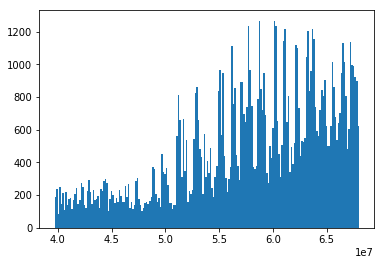

In [18]:
#15 mins no other processes on greenflash
plt.hist(decoder_missed_spikes['timestamp'].values,bins=200)
decoder_missed_spikes.shape

(43397, 5)

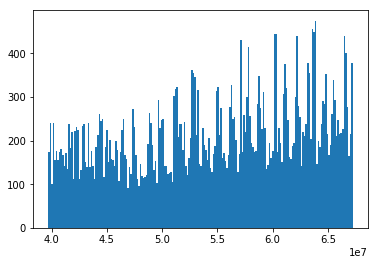

In [6]:
#15 mins velocity filter and set mark stdev = 10
plt.hist(decoder_missed_spikes['timestamp'].values,bins=200)
decoder_missed_spikes.shape

(47583, 5)

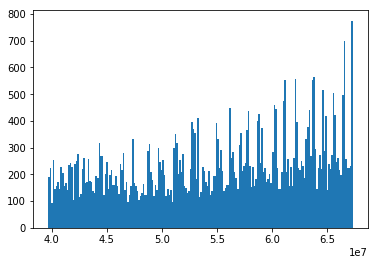

In [15]:
#15 mins velocity filter, mark stdev = 20, rstartree factor = 3
plt.hist(decoder_missed_spikes['timestamp'].values,bins=200)
decoder_missed_spikes.shape

(146300, 5)

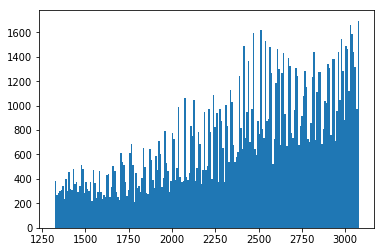

In [72]:
#30 mins velocity filter, mark stdev = 20, rstartree factor = 3
plt.hist(decoder_missed_spikes['timestamp'].values/30000,bins=200)
decoder_missed_spikes.shape

(33000, 5)

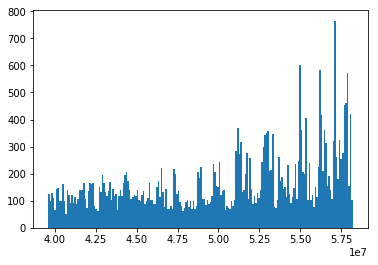

In [36]:
# 10 minutes running regular encoder
plt.hist(decoder_missed_spikes['timestamp'].values,bins=200)
decoder_missed_spikes.shape

(0, 1200)

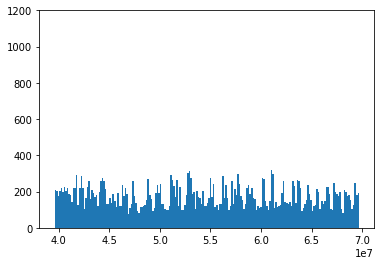

In [8]:
#15 mins no encoder
plt.hist(decoder_missed_spikes['timestamp'].values,bins=200)
decoder_missed_spikes.shape
plt.ylim([0,1200])

(array([ 402.,  560.,  502.,  414.,  550.,  515.,  637.,  504.,  568.,
         534.,  488.,  808.,  582.,  520.,  528.,  500.,  665.,  610.,
         443.,  789.,  370.,  419.,  778.,  788.,  626., 1095.,  856.,
         439., 1443., 1674., 1555.,  610., 1713., 2161., 1221., 1501.,
        1116., 1018., 2557., 1976.,  887., 2488., 2011., 2172., 2334.,
        3039., 1591., 2528., 2787., 1558., 1506., 3004., 1607., 2611.,
        2187., 1667., 2853., 2292., 2345., 2641., 2799., 1942., 2487.,
        2147., 2167., 2368., 2130., 2625., 1841., 2503., 2286., 2029.,
        2354., 2056., 2300., 2199., 2263., 2184., 2069., 2136., 2123.,
        2080., 2192., 2091., 2086., 2068., 2116., 1970., 1983., 2035.,
        1932., 1938., 1946., 1828., 1932., 1790., 1784., 1761., 1848.,
        1763.]),
 array([39723303.        , 40121133.32      , 40518963.64      ,
        40916793.96      , 41314624.28      , 41712454.6       ,
        42110284.92      , 42508115.24      , 42905945.56      ,
       

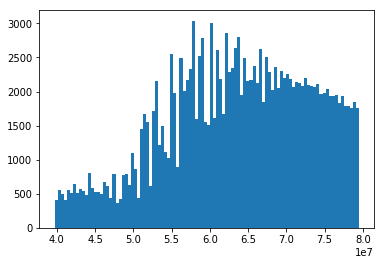

In [52]:
# 22 mins, voer teamviewer, etc
plt.hist(decoder_missed_spikes['timestamp'].values,bins=100)


(array([3.2385e+04, 9.9970e+03, 6.0310e+03, 4.5720e+03, 3.6530e+03,
        3.1570e+03, 2.7930e+03, 2.8120e+03, 2.7110e+03, 2.5450e+03,
        2.4740e+03, 2.4320e+03, 2.2870e+03, 2.2050e+03, 2.1830e+03,
        2.1180e+03, 1.8740e+03, 1.7520e+03, 1.5830e+03, 1.4350e+03,
        1.2630e+03, 1.1900e+03, 1.1380e+03, 1.1150e+03, 1.1640e+03,
        1.0570e+03, 1.0570e+03, 1.0380e+03, 9.5000e+02, 1.0160e+03,
        1.0030e+03, 9.9900e+02, 9.8900e+02, 8.8100e+02, 8.5300e+02,
        8.6400e+02, 8.7300e+02, 8.3900e+02, 9.1100e+02, 1.0220e+03,
        1.0270e+03, 1.1370e+03, 1.2220e+03, 1.2520e+03, 1.1830e+03,
        1.1800e+03, 1.1630e+03, 1.1820e+03, 1.1020e+03, 1.0910e+03,
        1.1430e+03, 1.0820e+03, 1.1750e+03, 1.1760e+03, 1.1520e+03,
        1.2330e+03, 1.2650e+03, 1.2030e+03, 1.2000e+03, 1.1180e+03,
        1.1810e+03, 1.2670e+03, 1.3790e+03, 1.4340e+03, 1.4730e+03,
        1.5790e+03, 1.5650e+03, 1.7460e+03, 1.8610e+03, 2.0280e+03,
        1.8690e+03, 1.7620e+03, 1.5780e+03, 1.45

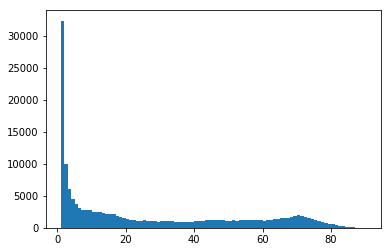

In [74]:
#22 mins through teamviewer and firefox and jupyter running
plt.hist(decoder_missed_spikes['late_bin']-decoder_missed_spikes['real_bin'],bins=np.arange(1,91,1))

(95656, 5)

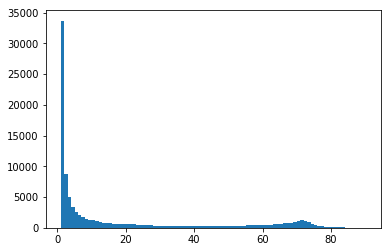

In [8]:
#15 mins no background processes on greenflash
plt.hist(decoder_missed_spikes['late_bin']-decoder_missed_spikes['real_bin'],bins=np.arange(1,91,1))
decoder_missed_spikes.shape

(146300, 5)

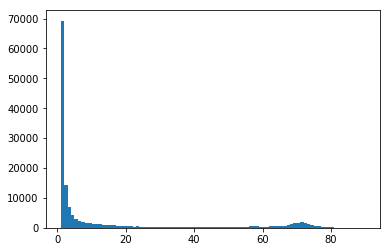

In [9]:
#30 mins velocity filter, mark stdev = 20, rstartree factor = 3
plt.hist(decoder_missed_spikes['late_bin']-decoder_missed_spikes['real_bin'],bins=np.arange(1,91,1))
decoder_missed_spikes.shape

(34939, 5)

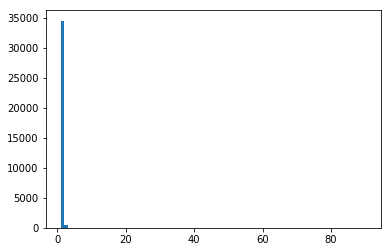

In [6]:
#15 mins no mark_query
plt.hist(decoder_missed_spikes['late_bin']-decoder_missed_spikes['real_bin'],bins=np.arange(1,91,1))
decoder_missed_spikes.shape

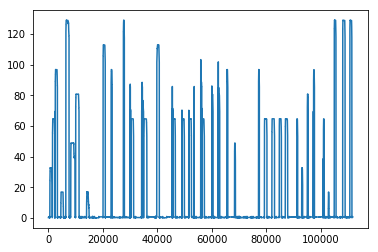

In [54]:
#decoder_data[decoder_data['real_pos'] > 128]
plt.plot(decoder_data['real_pos'].values)

In [29]:
np.histogram(decoder_data['real_pos'].values,bins=np.arange(0,129,1))

(array([40842,     0,     0,     0,     0,    63,   123,    51,   107,
           48,    70,    42,    51,    66,    49,   209,  1026,     5,
            0,     0,     0,    15,    23,    22,    19,    17,    13,
           24,    20,    23,    32,    33,   627,     0,     0,     0,
            0,    30,    47,   237,    89,    24,    25,    16,    16,
           16,    21,    42,  1017,     0,     0,     0,     0,   196,
          178,   142,   132,   127,   112,   103,    87,   122,   144,
          215,  4902,     0,     0,     0,     0,   343,   331,   142,
           62,    80,    55,    77,    74,    22,    28,    32,   994,
            0,     0,     0,     0,   282,   160,   131,   108,    36,
           33,    30,    47,    34,    51,    65,   751,     0,     0,
            0,     0,    84,   119,    77,    45,    54,    44,    44,
           42,    34,    85,   110,   945,   168,     0,     0,     0,
           28,    48,    52,    64,    68,    40,    49,    40,    49,
      

In [24]:
    # to calculate histogram of posterior max position in each time bin

hist_bins = []
post_hist0 = decoder_data[decoder_data['spike_count']>0]
post_hist1 = post_hist0.drop(['rec_ind','timestamp','real_pos_time','real_pos','spike_count'], axis=1)
#post_hist1.fillna(0,inplace=True)
post_hist3 = post_hist1.idxmax(axis=1)
post_hist3 = post_hist3.str.replace('x','')
post_hist3 = post_hist3.astype(int)
print(post_hist3.shape)
hist_bins = np.histogram(post_hist3,bins=np.arange(0,130))
print(hist_bins)
unique, counts = np.unique(post_hist3, return_counts=True)
print(dict(zip(unique,counts)))

(108302,)
(array([1816,  367,    0,    0,    0,  728,  339, 3328,  747,  865,  360,
       1682,   94,  302,  414, 1387,  606,   13,    0,    0,    0, 3189,
       3185, 5516,  281,  412, 2217, 1517,  484, 1287, 1029,  837,  148,
          7,    0,    0,    0, 4273, 1176,  671,  410,  516, 1069,  369,
        737,  166,  111,  176,    4,    0,    0,    0,    0, 2476,  625,
        716,  187,   51,  138,   45,  191,  575, 1023,  500,  304,    0,
          0,    0,    0, 4218, 8889, 3770, 4415, 1029,  585,  313,  229,
        103,  324,  203,    9,    0,    0,    0,    0, 1304, 1160,  170,
       1702,  338,  627,  324,  297,  587, 1310, 2137,   33,    2,    0,
          0,    0,  148,  610,  788,  273,  425,  719,  400,  328,  360,
        285,  251,    1,  174,    0,    0,    0, 6976, 3899, 3932, 1647,
        405,  258,  559,  357,  307, 1139,  315,    2]), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22, 

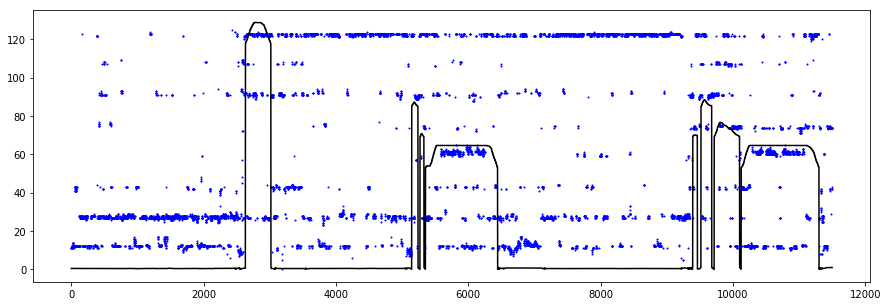

In [82]:
#plt.hist(post_hist3,bins=np.arange(0,130)
plt.figure(figsize=(15,5))
plt.scatter(np.arange(0,144437,1),post_hist3.values[25000:36500],s=1,c='blue')
plt.plot(decoder_data['real_pos'].values[25000:36500],'k')

In [70]:
post_hist3.index

6           0
9           0
23          0
25          0
31          0
         ... 
111825    107
111826    107
111828    108
111830    106
111831    107
Length: 51114, dtype: int64

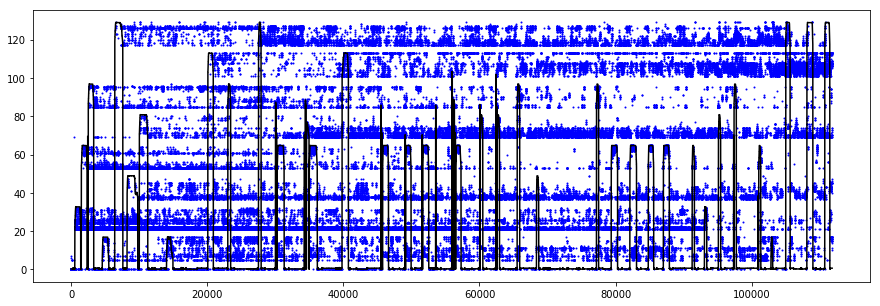

In [57]:
#plt.hist(post_hist3,bins=np.arange(0,130)
plt.figure(figsize=(15,5))
plt.scatter(np.arange(0,82872,1),post_hist3.values,s=1,c='blue')
plt.plot(decoder_data['real_pos'].values,'k')

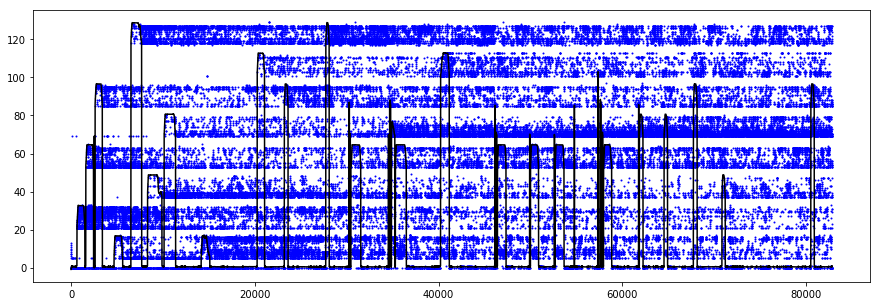

In [8]:
# 15 mins, velocity filter and mark stdev = 10
plt.figure(figsize=(15,5))
plt.scatter(np.arange(0,82872,1),post_hist3.values,s=1,c='blue')
plt.plot(decoder_data['real_pos'].values,'k')

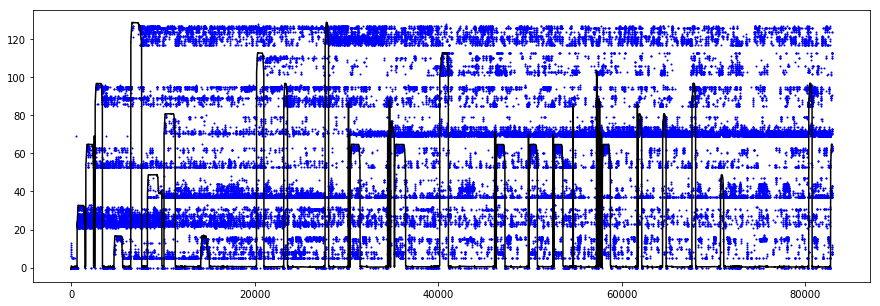

In [17]:
# 15 mins, velocity filter and mark stdev = 10
plt.figure(figsize=(15,5))
plt.scatter(np.arange(0,82906,1),post_hist3.values,s=1,c='blue')
plt.plot(decoder_data['real_pos'].values,'k')

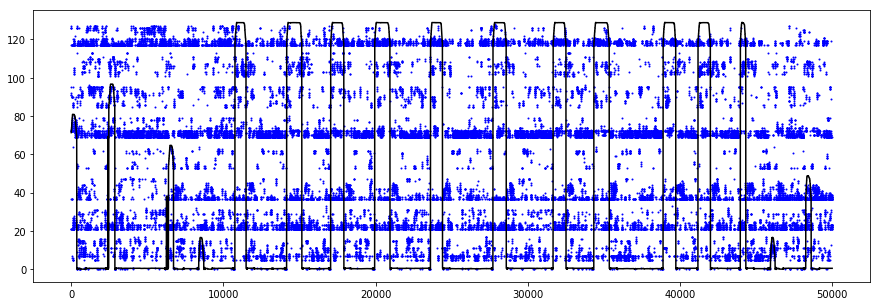

In [13]:
# 30 mins, velocity filter and mark stdev = 20, rstartree factor = 3
plt.figure(figsize=(15,5))
plt.scatter(np.arange(0,50000,1),post_hist3.values[100000:150000],s=1,c='blue')
plt.plot(decoder_data['real_pos'].values[100000:150000],'k')

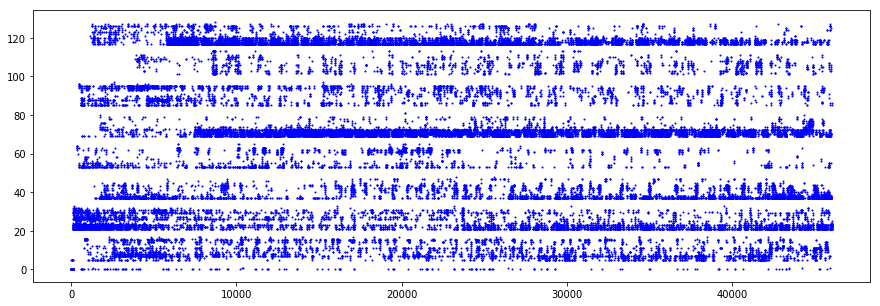

In [23]:
# no spike bins
plt.figure(figsize=(15,5))
plt.scatter(np.arange(0,46049,1),post_hist3.values,s=1,c='blue')
#plt.plot(decoder_data['real_pos'].values[100000:150000],'k')

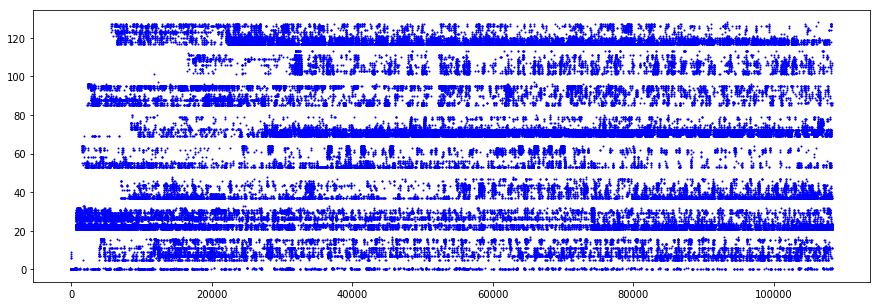

In [25]:
# bins with > 0 spikes
plt.figure(figsize=(15,5))
plt.scatter(np.arange(0,108302,1),post_hist3.values,s=1,c='blue')

(154351, 135)

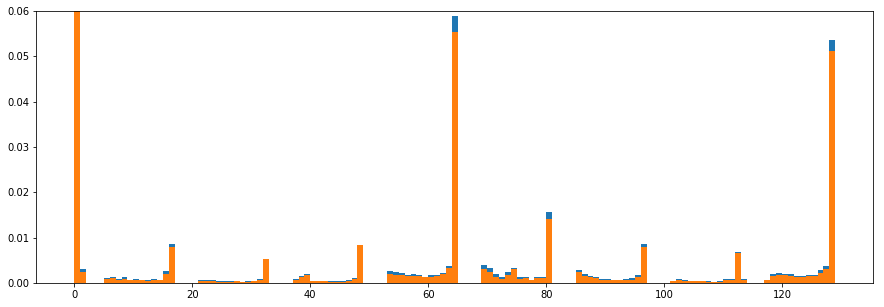

In [71]:
#histogram of occupancy
plt.figure(figsize=(15,5))
plt.hist(encoder_data['position'].values,bins=np.arange(0,130,1),density=True)
plt.hist(decoder_data['real_pos'].values,bins=np.arange(0,130,1),density=True)
plt.ylim([0,.06000])
decoder_data.shape

In [63]:
i = 30
pos_range = position_values[(position_values>position_bins[i-1]) & (position_values<position_bins[i])]
print(pos_range.max())
print(pos_range.min())
bin_max = (max(position_values[(position_values>position_bins[i-1]) & (position_values<position_bins[i])]) - position_bins[i-1])
bin_min = (min(position_values[(position_values>position_bins[i-1]) & (position_values<position_bins[i])]) - position_bins[i-1])
(bin_max-bin_min)/(position_bins[i]-position_bins[i-1])

29.984097977228018
29.02685032250023


0.9572476547277873

[[0.99518007 1.         1.         1.         1.         0.97077234
  0.97169403 0.93067875 0.94842133 0.91662292 0.96800728 0.86063012
  0.97169403 0.94450405 0.97837637 0.96892897 0.95855988 1.
  1.         1.         1.         0.86812547 0.8914316  0.81707161
  0.76601775 0.7046433  0.76868271 0.95635933 0.54293777 0.95724765
  0.95102941 0.93626722 0.75836212 1.         1.         1.
  1.         0.85269268 0.96079731 0.97497092 0.82144071 0.97479582
  0.86413663 0.91537173 0.95243323 0.81563119 0.99785881 0.89248384
  0.90956221 1.         1.         1.         1.         0.91322609
  0.99504438 0.96987683 0.96987683 0.98497736 0.94155146 0.9875416
  0.99001087 0.95665199 0.99060445 0.99692008 0.7967668  1.
  1.         1.         1.         0.95885309 0.95867709 0.95832511
  0.95779713 0.9585011  0.95797312 0.99188516 0.95762113 0.91930925
  0.9205412  0.95814911 0.96219697 1.         1.         1.
  1.         0.8044039  0.97882568 0.97441734 0.97882568 0.93915066
  0.94671898 

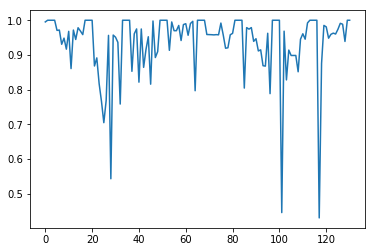

In [64]:
# calculate coverge for each position bin

position_values = encoder_data['position'].values
position_bins = np.arange(0,131,1)

bin_coverage = np.ones((1,len(position_bins)))

for i in np.arange(0,len(position_bins),1):

    if i > 0:

        if len(position_values[(position_values>position_bins[i-1]) & 

                                      (position_values<position_bins[i])])>0:

            #print(position_bins[i])

            #print(position_bins[i-1])

            bin_max = (max(position_values[(position_values>position_bins[i-1]) & (position_values<position_bins[i])]) - position_bins[i-1])
            bin_min = (min(position_values[(position_values>position_bins[i-1]) & (position_values<position_bins[i])]) - position_bins[i-1])

            bin_coverage[0][i-1] = (bin_max-bin_min)/(position_bins[i]-position_bins[i-1])



print(bin_coverage)

plt.plot(bin_coverage[0])

(array([1.9725e+04, 1.3919e+04, 8.8990e+03, 4.6690e+03, 1.8240e+03,
        6.7500e+02, 1.9900e+02, 6.1000e+01, 2.1000e+01, 8.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

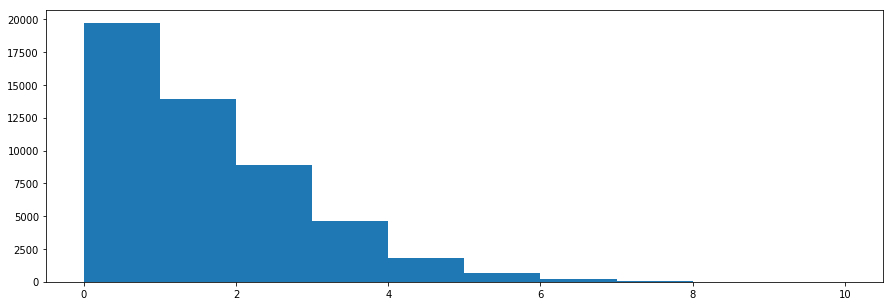

In [20]:
plt.figure(figsize=(15,5))
#plt.plot(decoder_data['spike_count'].values[100000:150000],'k')
plt.hist(decoder_data['spike_count'].values[100000:150000])

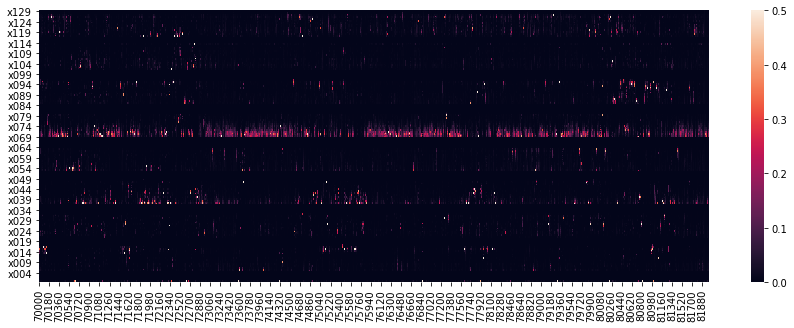

In [47]:
#plt.imshow(post_hist1)
#post_hist1
#import numpy as np 
#from pandas import DataFrame
import seaborn as sns
%matplotlib inline

post_heatmap = post_hist1[70000:82000].transpose()
post_heatmap = post_heatmap.iloc[::-1]

plt.figure(figsize=(15,5))
sns.heatmap(post_heatmap,vmin=0, vmax=0.5)
#sns.heatmap(post_hist1[50000:55000],vmin=0, vmax=0.5)


In [40]:
post_heatmap[0:10][0:10]

,0,1,2,3,4,5,6,7,8,9,...,82896,82897,82898,82899,82900,82901,82902,82903,82904,82905
x000,0.0095,0.0095,0.0095,0.0095,0.0095,0.0024,0.0044,0.0021,0.0041,9.9985e-01,...,1.6549e-04,9.2633e-04,2.0082e-03,3.8603e-04,2.4209e-03,1.9502e-04,4.7516e-03,9.9306e-04,6.3073e-05,2.0692e-04
x001,0.0010,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,1.4192e-07,...,1.5530e-16,6.0098e-08,4.0161e-08,8.5957e-18,1.1415e-12,2.1650e-22,3.8192e-08,4.0014e-16,5.4065e-30,1.0955e-20
x002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000e+00,...,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
x003,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000e+00,...,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
x004,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000e+00,...,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
x005,0.0095,0.0095,0.0095,0.0095,0.0095,0.0096,0.0089,0.0088,0.0084,1.3033e-06,...,1.2774e-03,3.1595e-03,7.8496e-03,9.3590e-03,1.9230e-02,1.1881e-02,1.0567e-02,1.7437e-03,8.4275e-05,2.0626e-03
x006,0.0095,0.0095,0.0095,0.0095,0.0095,0.0096,0.0096,0.0095,0.0094,1.4275e-06,...,3.0116e-03,8.7275e-03,6.7125e-03,5.9411e-03,9.6639e-03,2.5966e-03,3.8765e-03,3.6281e-03,6.0434e-03,1.5945e-03
x007,0.0095,0.0095,0.0095,0.0095,0.0095,0.0096,0.0096,0.0097,0.0096,1.4873e-06,...,3.0890e-03,9.7142e-03,1.0835e-02,4.8080e-03,2.4963e-02,4.9837e-03,5.3248e-03,9.7314e-03,8.8556e-04,1.9797e-02
x008,0.0095,0.0095,0.0095,0.0095,0.0095,0.0096,0.0096,0.0097,0.0097,1.5031e-06,...,5.2107e-03,9.6831e-03,1.0227e-02,3.1983e-02,1.8029e-02,9.1121e-03,5.0107e-03,6.4594e-04,2.6810e-02,7.4407e-03
x009,0.0095,0.0095,0.0095,0.0095,0.0095,0.0096,0.0096,0.0097,0.0097,1.5063e-06,...,7.8378e-04,4.8149e-03,4.3189e-03,1.3694e-03,1.2036e-02,5.7418e-04,1.5773e-03,4.1995e-03,1.8673e-04,4.1870e-03


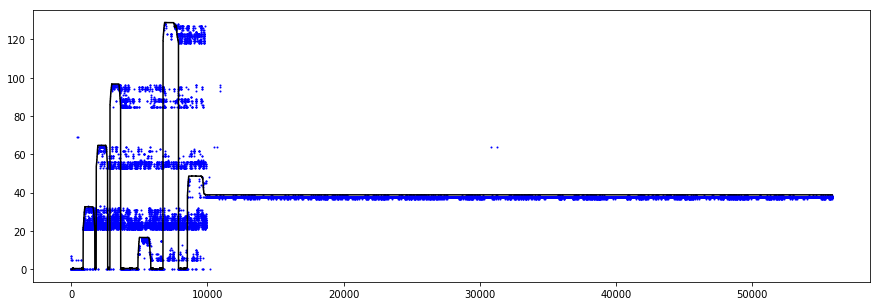

In [38]:
plt.figure(figsize=(15,5))
plt.scatter(np.arange(0,55860,1),post_hist3.values,s=1,c='blue')
plt.plot(decoder_data['real_pos'].values,'k')

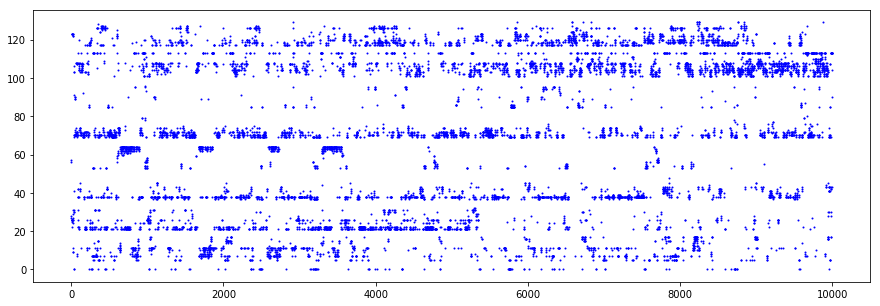

In [67]:
plt.figure(figsize=(15,5))

plt.scatter(np.arange(0,10000,1),post_hist3.values[50000:60000],s=1,c='blue')
plt.scatter(post_hist3.timestamps[50000:60000],post_hist3.values[50000:60000],s=1,c='blue')
#plt.plot(decoder_data['real_pos'].values,'k')

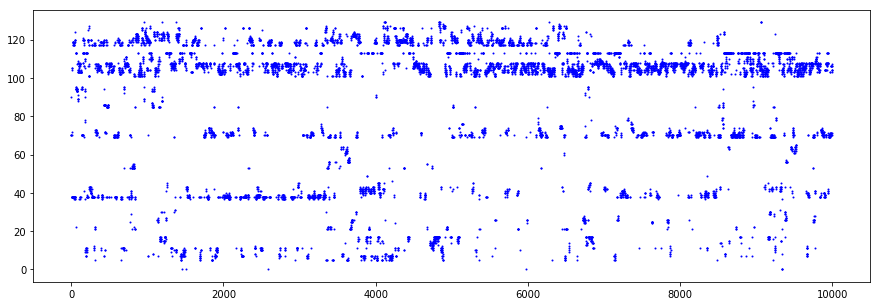

In [69]:
plt.figure(figsize=(15,5))

plt.scatter(np.arange(0,10000,1),post_hist3.values[40000:50000],s=1,c='blue')

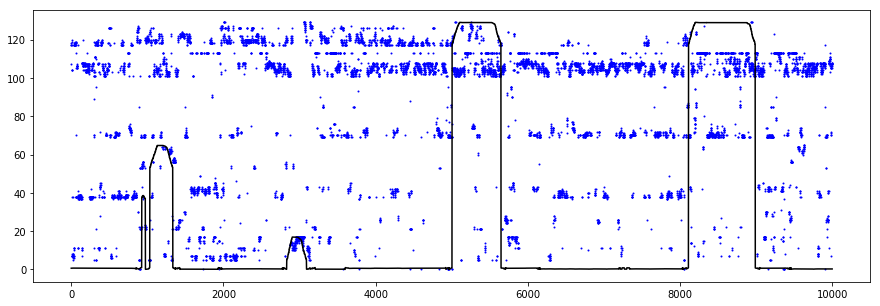

In [61]:
plt.figure(figsize=(15,5))
plt.scatter(np.arange(0000,10000,1),post_hist3.values[100000:110000],s=1,c='blue')
plt.plot(decoder_data['real_pos'].values[100000:110000],'k')

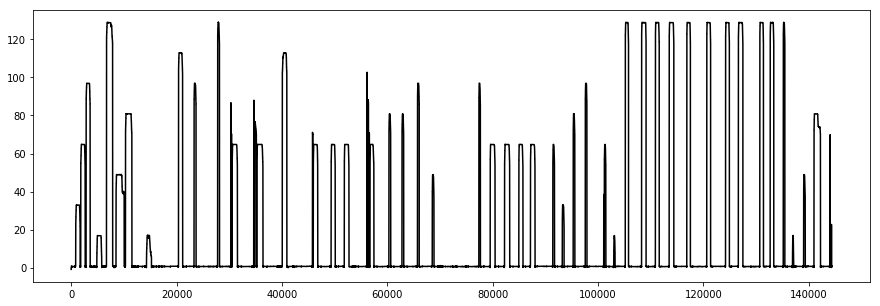

In [17]:
#removed empty bins
plt.figure(figsize=(15,5))
#plt.scatter(np.arange(0,76093,1),post_hist3.values,s=1,c='blue')
plt.plot(decoder_data['real_pos'].values,'k')

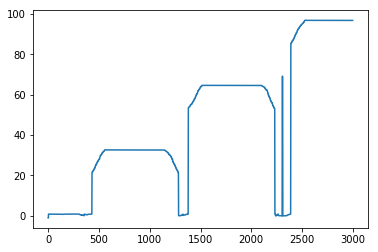

In [51]:
#plt.plot(decoder_data['real_pos'].values[2000:3000])
plt.plot(decoder_data['real_pos'].values[0:3000])

In [9]:
# make netcdf file from posteriors
import xarray as xr

is_position_bin = decoder_data.columns.str.startswith('x')
    
n_position_bins = is_position_bin.sum()
position_bin_centers = np.arange(n_position_bins)
        
coords = dict(
    timestamp=decoder_data.loc[:, 'timestamp'].values,
    real_pos=decoder_data.loc[:, 'real_pos'].values,
    position=position_bin_centers,
    num_spikes=decoder_data.loc[:, 'spike_count'].values)

post1 = xr.Dataset({'posterior': (('timestamp','position'), decoder_data.loc[:, is_position_bin].values)},coords=coords)

post1.to_netcdf('/mnt/vortex/mcoulter/spykshrk_realtime/posterior.nc')

/home/mcoulter/anaconda3/lib/python3.6/site-packages/dask/utils.py:1014: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")


In [8]:
post1

<xarray.Dataset>
Dimensions:     (num_spikes: 83524, position: 130, real_pos: 83524, timestamp: 83524)
Coordinates:
  * timestamp   (timestamp) int64 39717300 39717600 39717900 39718200 ...
  * real_pos    (real_pos) float64 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 0.7449 ...
  * position    (position) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * num_spikes  (num_spikes) int64 4 3 2 3 1 0 1 1 0 0 0 3 1 1 2 1 2 2 2 1 0 ...
Data variables:
    posterior   (timestamp, position) float64 0.0004583 8.995e-05 0.0 0.0 ...

In [ ]:
# to export linearized position to MatLab: again convert to xarray and then save as netcdf

position_file_name = '/mnt/vortex/mcoulter/spykshrk_realtime/linear_position.nc'
linearized_pos1 = pos_all_linear.apply_time_event(rips_vel_filtered, event_mask_name='ripple_grp')
linearized_pos2 = linearized_pos1.reset_index()
linearized_pos3 = linearized_pos2.to_xarray()
linearized_pos3.to_netcdf(position_file_name)


In [266]:
import holoviews as hv
hv.extension('matplotlib')
hv.extension('bokeh')

from spykshrk.franklab.pp_decoder.visualization import DecodeVisualizer
from spykshrk.franklab.data_containers import pos_col_format
from trodes2SS import AttrDict
import scipy as sp
encode_settings = AttrDict({'sampling_rate': 3e4,
                                'pos_bins': np.arange(0,130,1), # arm_coords_wewant
                                'pos_bin_edges': np.arange(0,130 + .1,1), # edges_wewant, 
                                'pos_bin_delta': 1, 
                                # 'pos_kernel': sp.stats.norm.pdf(arm_coords_wewant, arm_coords_wewant[-1]/2, 1),
                                'pos_kernel': sp.stats.norm.pdf(np.arange(0,130,1), 130/2, 1), #note that the pos_kernel mean should be half of the range of positions (ie 180/90) # sp.stats.norm.pdf(np.arange(0,560,1), 280, 1),    
                                'pos_kernel_std': 0, 
                                'mark_kernel_std': int(20), 
                                'pos_num_bins': 130, # len(arm_coords_wewant)
                                'pos_col_names': [pos_col_format(ii, 130) for ii in range(130)], # or range(0,max_pos,10)
                                'arm_coordinates': [0,129] ,   #new_arm_coords
                                'spk_amp': 60,
                                'vel': 0}) 

In [267]:
%%output backend='bokeh' size=400 holomap='scrubber'
%%opts RGB { +framewise} [height=100 width=250 aspect=2 colorbar=True]
%%opts Points [height=100 width=250 aspect=2 ] (marker='o' color='#AAAAFF' size=1 alpha=0.7)
%%opts Polygons (color='grey', alpha=0.5 fill_color='grey' fill_alpha=0.5)
#%%opts Image {+framewise}

# visualize posteriors - note will only work a small chunck of the posteriors table

dec_viz = DecodeVisualizer(decoder_data[0:200000], linpos=decoder_data['real_pos'].values, enc_settings=encode_settings)

#dec_viz = DecodeVisualizer(posteriors[0:200000], linpos=pos_all_linear.loc[(pos_all_linear["linvel_flat"]>4)], enc_settings=encode_settings)

dec_viz.plot_all_dynamic(stream=hv.streams.RangeXY(), plt_range=100, slide=10)

AttributeError: 'numpy.ndarray' object has no attribute 'get_mapped_single_axis'

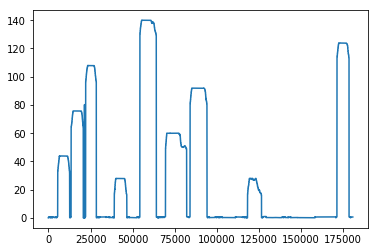

In [181]:
plt.plot(encoder_data['position'])

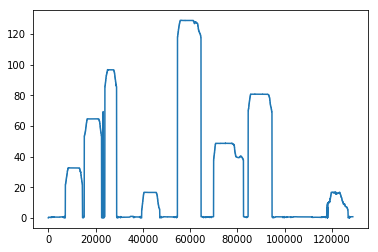

In [203]:
plt.plot(encoder_data['position'])

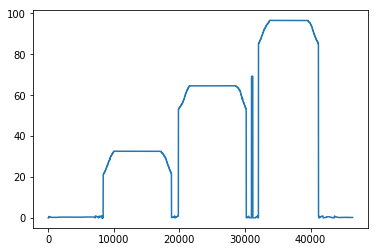

In [240]:
#plt.plot(encoder_data['position'][8360:8370])
plt.plot(encoder_data['position'])

In [ ]:
np.histogram(encoder_data['position'],bins=np.arange(0,130,1))

In [16]:
np.histogram(decoder_missed_spikes['late_bin']-decoder_missed_spikes['real_bin'],bins=91)

(array([35940, 13094,  8729,  6812,  5500,  4827,  4505,  4445,  4298,
         4226,  4203,  4068,  4032,  4025,  3812,  3579,  3238,  3084,
         2891,  2847,  2511,  2336,  2202,  1969,  1862,  1703,  1605,
         1528,  1510,  1464,  1382,  1321,  1307,  1185,  1139,  1181,
         1130,  1105,  1058,  1131,  1109,  1159,  1270,  1288,  1321,
         1259,  1220,  1302,  1274,  1226,  1275,  1254,  1240,  1184,
         1269,  1383,  1368,  1270,  1366,  1384,  1379,  1451,  1502,
         1489,  1430,  1621,  1791,  1947,  2012,  2099,  1950,  1840,
         1673,  1517,  1334,  1118,   968,   886,   659,   635,   507,
          329,   253,   182,   115,    59,    40,    25,    20,    13,
            6]),
 array([ 1.        ,  1.98901099,  2.97802198,  3.96703297,  4.95604396,
         5.94505495,  6.93406593,  7.92307692,  8.91208791,  9.9010989 ,
        10.89010989, 11.87912088, 12.86813187, 13.85714286, 14.84615385,
        15.83516484, 16.82417582, 17.81318681, 18.8021

(array([18420, 17760, 16151, 12391,  8639,  5172,  2721,  1336,   611,
          219,    71,    33]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]))

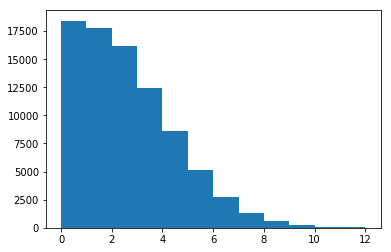

In [255]:
plt.hist(decoder_data['spike_count'],bins = 12)
np.histogram(decoder_data['spike_count'],bins = 12)

In [127]:
linear_position = np.loadtxt('/mnt/vortex/mcoulter/remy_trodes_linear_position_for_numpy.txt',delimiter=',')

array([[3.95250480e+07, 4.00000000e+00, 6.40641540e-01, 6.60000000e+02,
        4.18000000e+02],
       [3.95259720e+07, 4.00000000e+00, 6.45975070e-01, 6.61000000e+02,
        4.18000000e+02],
       [3.95268600e+07, 4.00000000e+00, 6.45975070e-01, 6.61000000e+02,
        4.17000000e+02],
       ...,
       [1.19825625e+08, 7.00000000e+00, 1.00000000e+00, 3.47000000e+02,
        8.70000000e+01],
       [1.19826513e+08, 7.00000000e+00, 1.00000000e+00, 3.48000000e+02,
        8.60000000e+01],
       [1.19827705e+08, 7.00000000e+00, 1.00000000e+00, 3.48000000e+02,
        8.60000000e+01]])

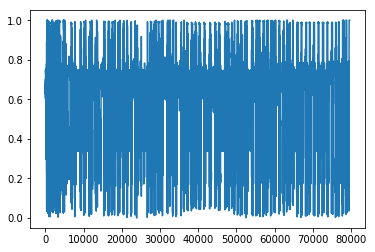

In [139]:
plt.plot(linear_position[:,2])
linear_position

In [169]:
segment = linear_position[:,1]
segment_pos = linear_position[:,2]
shift_linear_distance_by_arm_dictionary = dict()
#arm_shift_dictionary()

# 5cm bins - divide position by 5
# okay this looks like it works - 
# should test within the realtime script
# now we need a new transition matrix - where box is only 1 unit

hardcode_armorder = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14] #add progressive stagger in this order
hardcode_shiftamount = 4 # add this stagger to sum of previous shifts (1cm = 20)
        # for now set all arm lengths to 60 (1cm = 60)
linearization_arm_length = 12
    
        # Define dictionary for shifts for each arm segment
        #shift_linear_distance_by_arm_dictionary = dict() # initialize empty dictionary 
for arm in hardcode_armorder: # for each outer arm
    if arm < 7: # if all box segments, do nothing
        temporary_variable_shift = 0

    else: # if arm segments, shift with gap
        temporary_variable_shift = hardcode_shiftamount + linearization_arm_length + shift_linear_distance_by_arm_dictionary[hardcode_armorder[arm - 1]]
        
    shift_linear_distance_by_arm_dictionary[arm] = temporary_variable_shift
    
assigned_pos = np.zeros((1,len(segment)))

for i in range(0,len(segment)):
    if segment[i] < 7:
        assigned_pos[0,i] = segment_pos[i] + shift_linear_distance_by_arm_dictionary[segment[i]]
    else:
        assigned_pos[0,i] = segment_pos[i]*12 + shift_linear_distance_by_arm_dictionary[segment[i]]

assigned_pos

array([[ 0.64064154,  0.64597507,  0.64597507, ..., 28.        ,
        28.        , 28.        ]])

In [175]:
assigned_pos.max()

139.9326686

(0, 150)

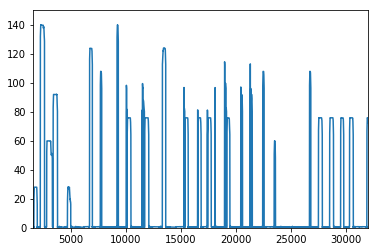

In [174]:
plt.plot(assigned_pos[0,:])
plt.xlim([1600,32000])
plt.ylim([0,150])

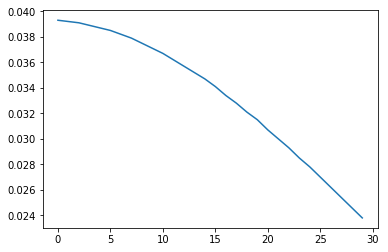

In [38]:
speedFilterValues = [0.0393,0.0392,0.0391,0.0389,0.0387,0.0385,0.0382,0.0379,
        0.0375,0.0371,0.0367,0.0362,0.0357,0.0352,0.0347,0.0341,0.0334,0.0328,0.0321,
        0.0315,0.0307,0.0300,0.0293,0.0285,0.0278,0.0270,0.0262,0.0254,0.0246,0.0238]
plt.plot(speedFilterValues)

In [8]:
stim_lockout_ranges = stim_lockout.pivot(index='lockout_num',columns='lockout_state', values='timestamp')
stim_lockout_ranges.reindex(columns=[1,0])

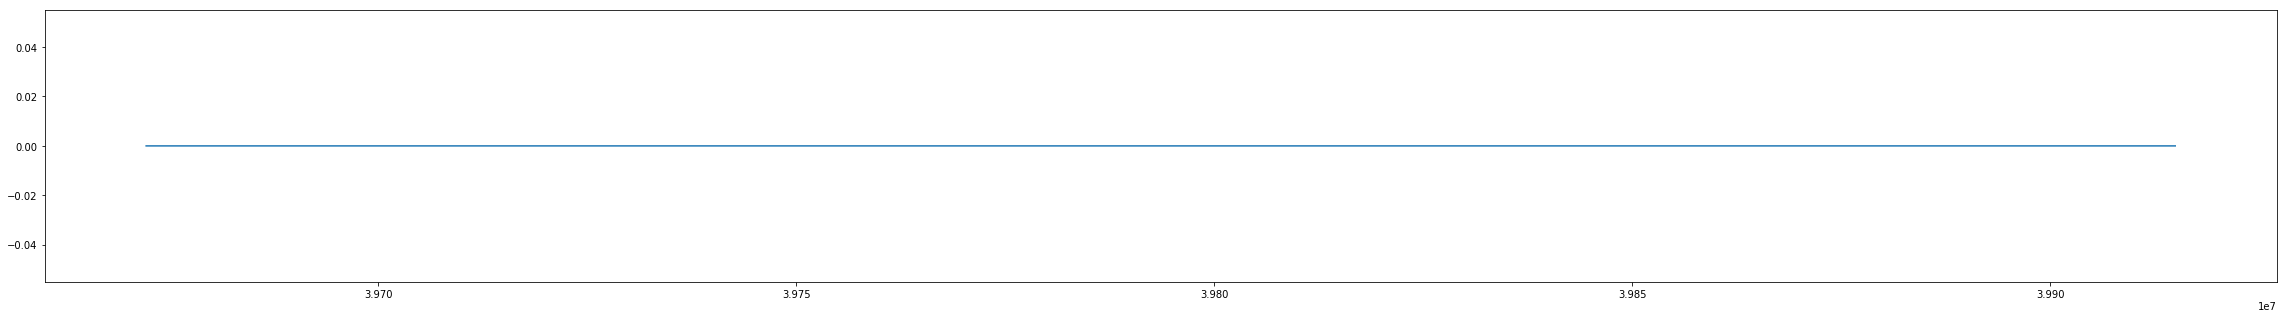

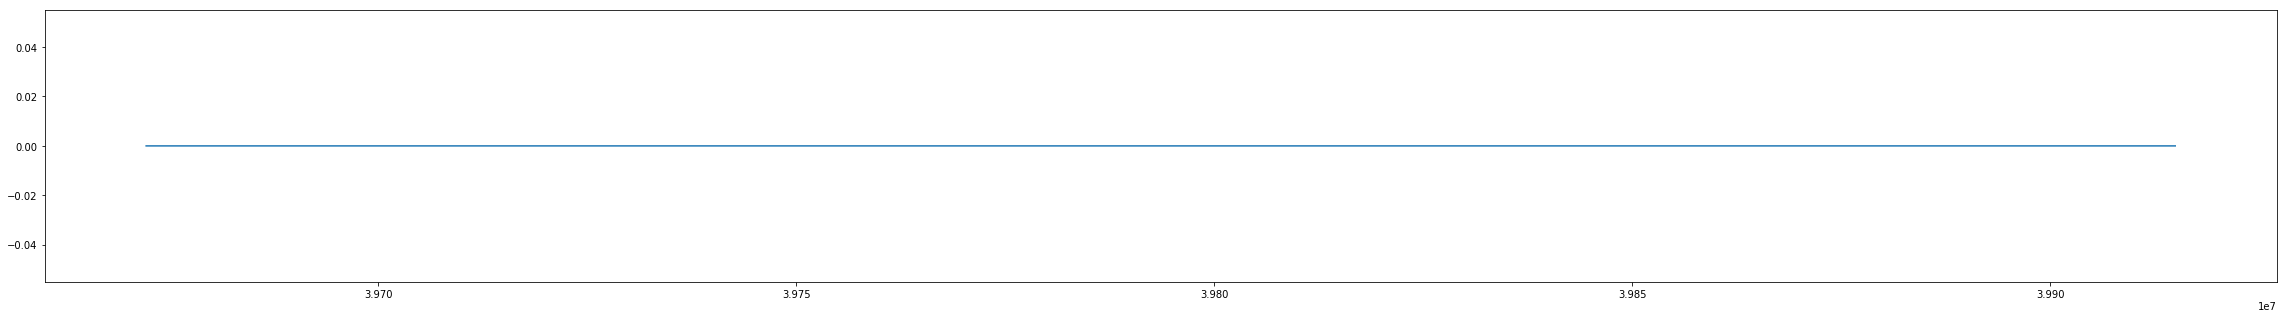

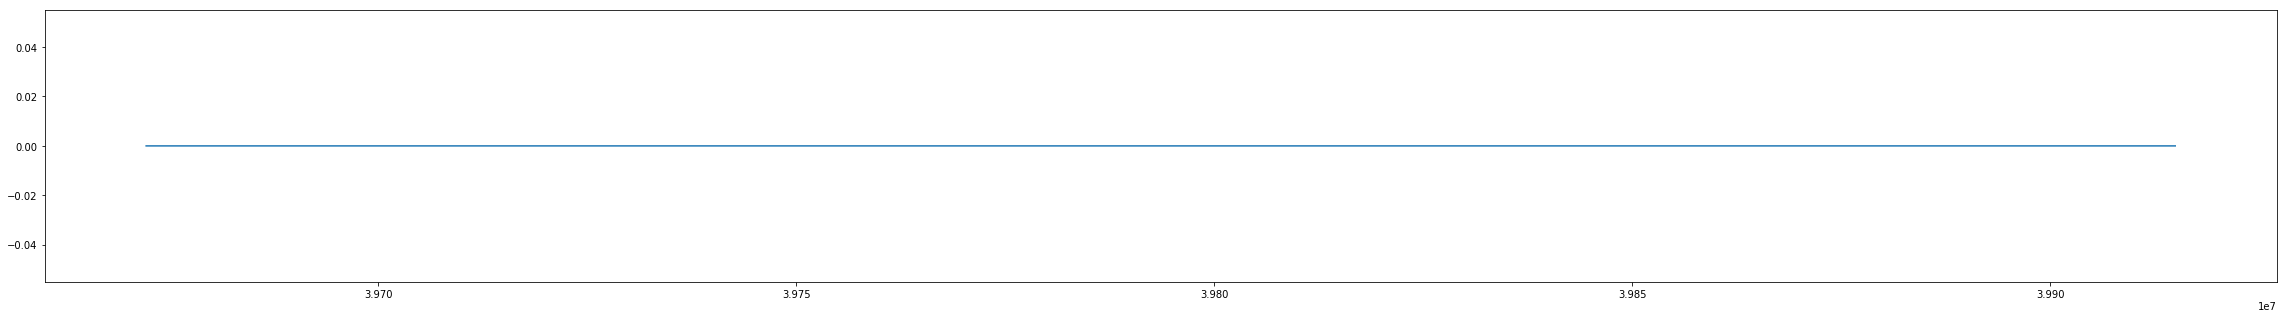

In [15]:
for group in ripple_data.groupby('elec_grp_id'):
    plt.figure(figsize=[40,5])
    lfp_data = group[1]['lfp_data']
    timestamp = group[1]['timestamp']
    plt.plot(timestamp, lfp_data)
    #plt.plot(stim_lockout_ranges.values.transpose(), np.tile([[400], [400]], [1, len(stim_lockout_ranges)]), 'r-*' )
plt.show()

In [11]:
plt.plot([[0, 1]], [[10, 10]], '-*')
plt.show()

In [16]:
pd.set_option('display.max_rows', 10)

ripple_data

,rec_ind,timestamp,elec_grp_id,thresh_crossed,lockout,custom_mean,custom_std,lfp_data,rd,current_val
0,1,39672240,5,False,False,12.769,8.034,0.0,0.0,0.0
1,4,39672240,11,False,False,13.067,8.143,0.0,0.0,0.0
2,7,39672240,19,False,False,12.997,8.057,0.0,0.0,0.0
3,10,39672260,5,False,False,12.769,8.034,0.0,0.0,0.0
4,13,39672260,11,False,False,13.067,8.143,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
36409,109225,39914960,5,False,False,12.769,8.034,0.0,0.0,0.0
36410,109231,39914960,19,False,False,12.997,8.057,0.0,0.0,0.0
36411,109237,39914980,11,False,False,13.067,8.143,0.0,0.0,0.0
36412,109234,39914980,5,False,False,12.769,8.034,0.0,0.0,0.0
